## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?



---



If the target/outcome variable is:
- categorical: then we are doing classification (e.g., whether a patient has a disease or not)
- numerical: then we are doing regression (e.g., predicting someone's height)

2. What is a confusion table/matrix? What does it help us understand about a model's performance?


---




 A confusion table/matrix is a table that cross-tabulates the true labels with the predicted ones, and see if they align or not. It evaluates fit and helps us understand whether we're making good or bad predictions.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?



---



Accuracy is basically "What proportion of the cases did we predict correctly?" We sum up the number of cases on the "descending diagonal" of the confusion matrix, and divide by the total number of observations to get accuracy. It can be very misleading with imbalanced datasets. For example, if only 5% of patients in a dataset have a disease, a model that always predicts "no disease" would be 95% accurate — but it's completely useless because it never catches a single sick patient.

4. What does the root mean squared error quantify about a particular model?


---



RMSE is the distance from the true values to the predicted ones, weighted by sample size (as n gets large, these values typically approach some fixed value). Basically RMSE measures how far off a model's predictions are from the actual values on average, penalizing larger errors more heavily. For example, being off by 10 is penalized much more than being off by 2 twice. Lower RMSE = better model.

5. What are overfitting and underfitting?


---



 Overfitting is picking k too low, the model is overly sensitive to a handful of data points. The model memorizes the noise and specific details rather than the general pattern. It performs great on training data but poorly on new, unseen data.

 On the other hand, if we pick
 too high, the model averages over many observations and will give answers close to population proportions; this is underfitting. The model is too simple and fails to capture the underlying pattern even in the training data. It performs poorly on both training and new data.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?


---




Splitting data into training and testing sets improves model performance because it simulates how the model will perform on real, unseen data. Then by testing different values of k on the test set and picking the one with the best accuracy or RMSE, you're choosing the model that generalizes best rather than the one that just memorized the training data.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.


---



Class label as a prediction gives a direct, definitive answer (boolean). This is useful when the target variable is simple, and you need a clear solution. However, we're not directly provided with a direct confidence metric.

Probability distribution provides a solution that gives the likelihood of each target variable(s). We are able to see how confident the model is, and we can easily adjust the threshold based on the confidence. However, a poorly calibrated model might say 95% confidence but be wrong many times.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).


---




In [1]:
! git clone https://github.com/natekim416/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27 (delta 6), reused 5 (delta 5), pack-reused 17 (from 1)
Receiving objects: 100% (27/27), 26.95 KiB | 1.08 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Download complete
Extracting data files...
Data extracted


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/land_mines.csv')

df.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


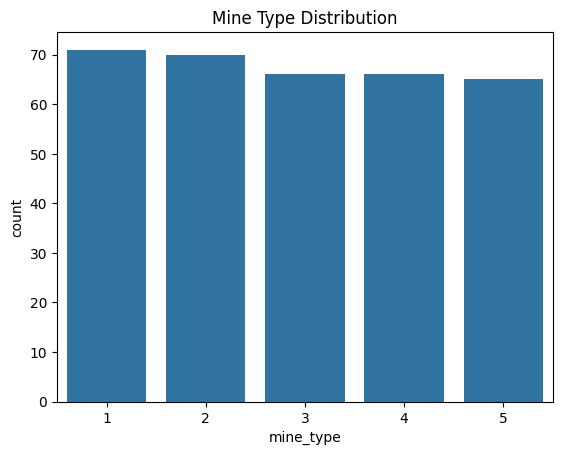

In [6]:
sns.countplot(x='mine_type', data=df)
plt.title('Mine Type Distribution')
plt.show()


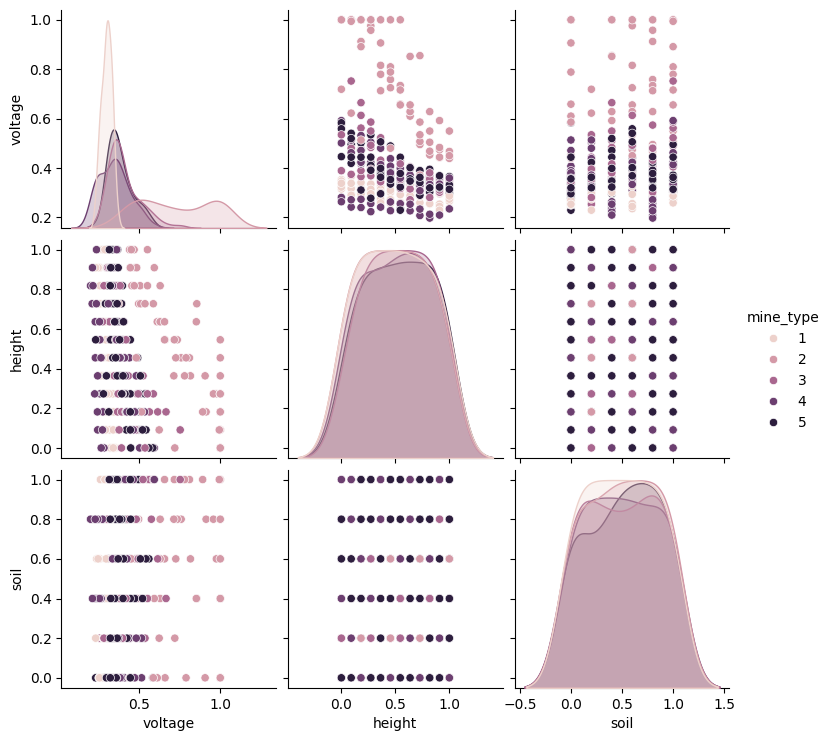

In [9]:
sns.pairplot(df, hue='mine_type', vars=['voltage', 'height', 'soil'])
plt.show()

2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


---



In [10]:
from sklearn.model_selection import train_test_split

X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 169
Test size: 169


3. Build a $k$-NN classifier. Explain how you select $k$.

---




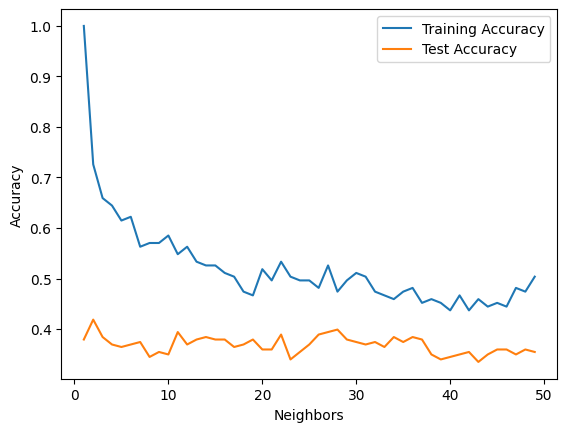

Optimal k: [2]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def minmax(x):
    u = (x - min(x)) / (max(x) - min(x))
    return u

y = df['mine_type']
ctrl_list = ['voltage', 'height', 'soil']
x = df.loc[:, ctrl_list]
u = x.apply(minmax)

# 50/50 train-test split with stratify
u_train, u_test, y_train, y_test = train_test_split(u, y,
                                                     test_size=0.6,
                                                     random_state=100,
                                                     stratify=y)

# Loop over all k values to find best k
k_grid = np.array([k for k in range(1, 50)])
test_accuracies = []
train_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model = model.fit(u_train, y_train)
    test_acc = model.score(u_test, y_test)
    train_acc = model.score(u_train, y_train)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

# Plot train vs test accuracy
sns.lineplot(x=k_grid, y=train_accuracies, label='Training Accuracy').set(xlabel='Neighbors', ylabel='Accuracy')
sns.lineplot(x=k_grid, y=test_accuracies, label='Test Accuracy')
plt.show()

# Find optimal k
test_accuracies = np.array(test_accuracies)
is_optimal = test_accuracies == np.max(test_accuracies)
optimal_indices = np.where(is_optimal)
k_optimal = k_grid[optimal_indices]
print("Optimal k:", k_optimal)

*I selected my K value by iterating through 1-50 and trying each one, trying to find the most optimal k value. KNN didn't work too well for mine types 4 and 5 (and maybe 3) because they have similar values to mine types 1 and 2. Soil didn't really help us classify, a lot of the mines overlapped. Height also had a lot of overlapping. Voltage helped the most but the large cluster of mines 4 and 5 amongst the other types made classifying 4 and 5 harder.*

4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


In [24]:
print(pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted']))
print("\nTest Accuracy:", model.score(u_test, y_test))

Predicted   1   2   3   4  5
Actual                      
1          31   0   6   3  3
2           0  34   4   4  0
3           9   2  13  11  5
4          17   2  14   6  0
5          13   1  16   8  1

Test Accuracy: 0.4187192118226601


The model achieved an accuracy of 41.87%. This lower accuracy reflects the difficulty and ambiguity of separating 5 mine types with 3 features. Mine types 1 and 2 were classified well and overall accurately. On the other hand, mine types 3, 4, and 5 struggled more signifying that those mine types occupied identical regions in voltage/height/soil feature space.

5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In practice, I would advise someone to be the most certain about type 2 mines. Because the model predicted type 2 mines with the highest accuracy, when mines are classifed to be type 2, they are most likely type 2. However, because of the stakes with mines, I would not 100% trust in and rely on this model. Especially when I see a mine type of 1, 3, 4, and 5. The model's predictions on those mine types were inaccuracte especially with only correctly guessing one 5 mine type. The core problem resides in the fact that types 1, 3, 4, and 5 all bleed into each other. This is primarily prevalent in the voltage feature space.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


2. Maxmin normalize `year` and `mileage`.


3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.


4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


5. Determine the optimal $k$ for these data.


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.


2. Make a correlation matrix. What variables are strongly associated with a death event?


3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?


4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.


5. Maxmin normalize all of the variables in `X`.


6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).


7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.


8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)